A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers.

- `flights2022.csv` contains information about about each flight including

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as

| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path1 = '/content/drive/MyDrive/dataset/flights2022.csv'
path2 = '/content/drive/MyDrive/dataset/flights_weather2022.csv'

fli = pd.read_csv(path1)
wth = pd.read_csv(path2)


In [5]:
#exploring the data
fli.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,route
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,SEA-IAH
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,SEA-FAI
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ATL
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ORD
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,PDX-ORD


In [6]:
wth.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [3]:
#creating the rout column by joining origin + destination
fli['route'] = fli['origin']+'-'+fli['dest']


In [4]:
#the average departure delay by route
delay_route = fli.groupby('route')['dep_delay'].mean()


In [7]:
#determining cancelled flights
can_sub = fli['dep_time'].isna() #in the dataset the cancelled flights are identified by having NA values for departure time
cancelled = fli[can_sub]
cancelled_flights = cancelled.value_counts('route').reset_index()

In [8]:
#resetting the index of delay routes
delay = delay_route.reset_index()

In [9]:
#joining the delay and cancelled dataframes on route columns
routes_delays_cancels = delay.merge(cancelled_flights, on = 'route', how = 'left')
routes_delays_cancels.columns = ['route', 'mean_dep_delay','total_cancellations']

In [11]:
#grouping by airline and determining the mean departure delay and total cancellations
airlines_delays_cancels = fli.groupby('airline').agg(mean_dep_delay = ('dep_delay','mean'),total_cancellations = ('dep_time',lambda x: x.isna().sum() )).reset_index()
airlines_delays_cancels

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12
5,Hawaiian Airlines Inc.,8.186207,4
6,Horizon Air,6.270965,238
7,JetBlue Airways,42.141524,33
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100


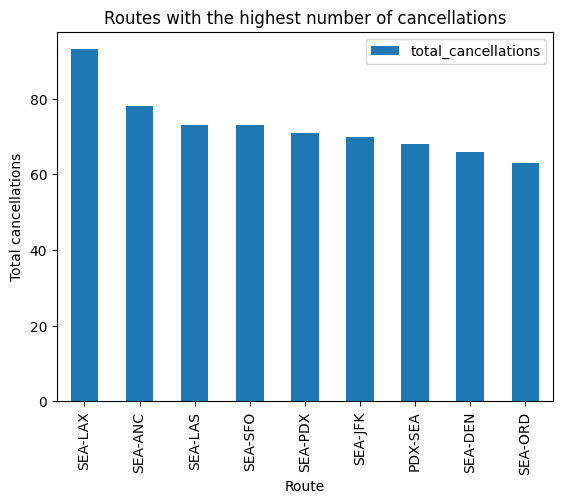

In [13]:
#top 9 routes with the most cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values(by = 'total_cancellations', ascending=False).iloc[:9,:]
top9 = top_routes_by_cancellations.plot(kind='bar', x = 'route', y = 'total_cancellations')
top9.set(xlabel = 'Route',ylabel = 'Total cancellations', title = 'Routes with the highest number of cancellations')
plt.show()

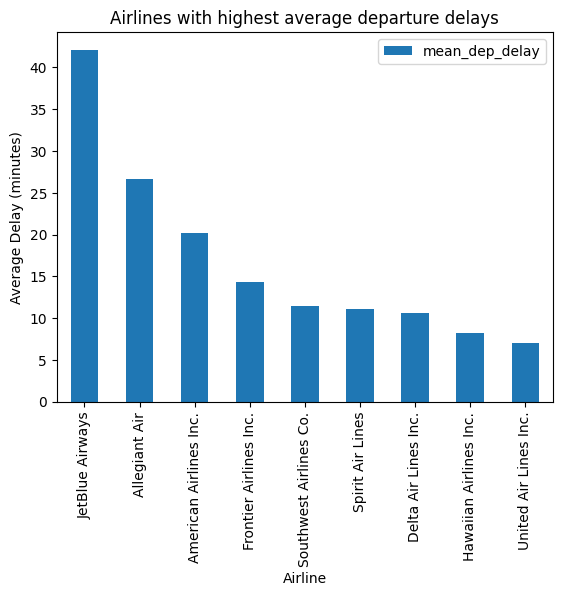

In [15]:
#the top9 airlines with the highest average delays
top_airline = airlines_delays_cancels.sort_values(by = 'mean_dep_delay',ascending = False).iloc[:9,:]
top9_arline = top_airline.plot(kind = 'bar', x = 'airline',y = 'mean_dep_delay')
top9_arline.set(xlabel = 'Airline', ylabel = 'Average Delay (minutes)', title = 'Airlines with highest average departure delays')
plt.show()

In [32]:
#does 10mph or more winds interfere in the departure delay in the SEA and PDX airports?
#subsetting the data frames to the origins SEA PDX and creating two others to wind difference
wth2 = wth[wth['origin'].isin(['SEA','PDX'])]
wth10 = wth2[wth2['wind_gust']>=10]
wth_ = wth2[wth2['wind_gust']<10]
#getting mean dep delay for the different wind conditions
mean_dep_10 = wth10.groupby('origin')['dep_delay'].mean()
mean_dep = wth_.groupby('origin')['dep_delay'].mean()
i = ['>=10mph wind','<10mph wind']
pdx = pd.Series([mean_dep_10.loc['PDX'],mean_dep.loc['PDX']], index = i)

>=10mph wind    9.147024
<10mph wind     6.690238
dtype: float64

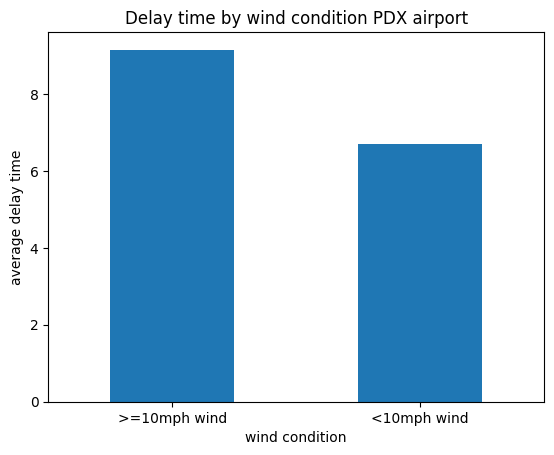

In [36]:
a = pdx.plot(kind = 'bar')
a.set(title = 'Delay time by wind condition PDX airport', xlabel = 'wind condition',ylabel = 'average delay time')
a.set_xticklabels(i, rotation =0)
plt.show()

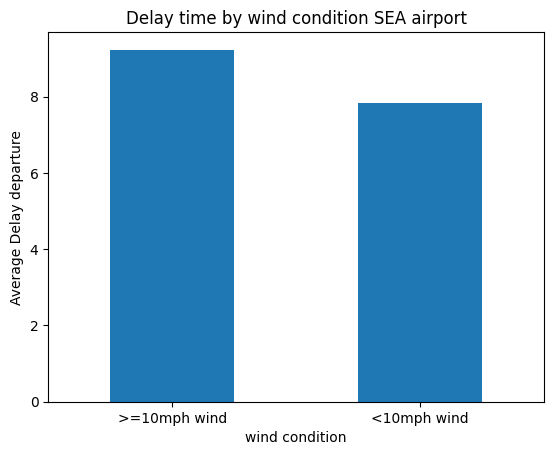

In [37]:
#visualizing delay by wind condition SEA airport
sea = pd.Series([mean_dep_10.loc['SEA'],mean_dep.loc['SEA']], index = i)
b = sea.plot(kind = 'bar')
b.set(xlabel = 'wind condition',ylabel = 'Average Delay departure', title = 'Delay time by wind condition SEA airport')
b.set_xticklabels(i, rotation = 0)
plt.show()
